In [2]:
import numpy as np
import matplotlib.pyplot as plt
import utilis as u
import importlib
import model as m 
import mlp as ml

Using TensorFlow backend.


In [3]:
filename = '/data_batch_1'
X_train, y_train,Y_train = u.load_data(filename, reshape=False, clipping=True)
meanX = np.mean(X_train,axis=1)
stdX = np.std(X_train,axis=1)
X_train = (X_train-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/data_batch_2'
X_val, y_val,Y_val = u.load_data(filename, reshape=False, clipping=True)
X_val = (X_val-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

filename = '/test_batch'
X_test, y_test,Y_test = u.load_data(filename, reshape=False, clipping=True)
X_test = (X_test-meanX.reshape((len(meanX),1)))/stdX.reshape((len(stdX),1))

# First Model

In [3]:
importlib.reload(m)
l = int((100 * 2 * 500 * 1)/X_train.shape[1])
final_test_acc = []
final_val_acc = []
final_train_acc = []
avg_test_acc = []
avg_val_acc = []
avg_train_acc = []
avg_train_loss = []
avg_train_cost = []
avg_val_loss = []
avg_val_cost = []
for seed in [1,2,3,4,5]:
    GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':500, 'n_cycles':1, 'freq':10,'seed':seed,'lambda':0.01}
    layers, hist = m.load_network(GD_params,'cyclic_learning_ex1',True)
    train_loss = hist.item()['train_loss']
    train_cost = hist.item()['train_cost']
    val_loss = hist.item()['val_loss']
    val_cost = hist.item()['val_cost']
    train_acc = hist.item()['train_acc']
    val_acc = hist.item()['val_acc']
    avg_test_acc = np.zeros(l)
    avg_val_acc.append(val_acc)
    avg_train_acc.append(train_acc)
    avg_train_loss.append(train_loss)
    avg_train_cost.append(train_cost)
    avg_val_loss.append(val_loss) 
    avg_val_cost.append(val_cost)
    test_acc = m.get_test_acc(X_test,y_test,layers)
    final_test_acc.append(test_acc)
    final_train_acc.append(train_acc[-1])
    final_val_acc.append(val_acc[-1])


print(f"{np.round(np.mean(final_train_acc),5)} \pm {np.round(np.std(final_train_acc),5)} & {np.round(np.mean(final_val_acc),5)} \pm {np.round(np.std(final_val_acc),5)} & {np.round(np.mean(final_test_acc),5)} \pm {np.round(np.std(final_test_acc),5)}")

0.59542 \pm 0.00266 & 0.45124 \pm 0.00242 & 0.46086 \pm 0.0015


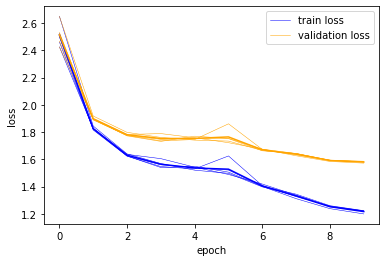

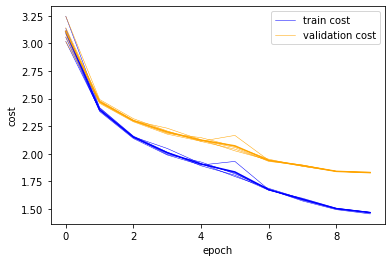

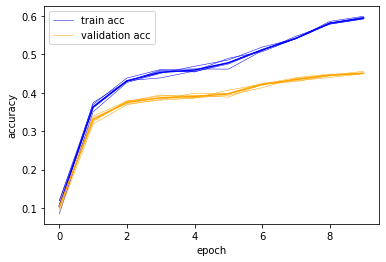

In [4]:
for i in range(5):
    plt.plot(avg_train_loss[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_loss[i],color='orange',linewidth=0.5)
train = np.array(avg_train_loss)
val = np.array(avg_val_loss)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.show()

for i in range(5):
    plt.plot(avg_train_cost[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_cost[i],color='orange',linewidth=0.5)
train = np.array(avg_train_cost)
val = np.array(avg_val_cost)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()

for i in range(5):
    plt.plot(avg_train_acc[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_acc[i],color='orange',linewidth=0.5)
train = np.array(avg_train_acc)
val = np.array(avg_val_acc)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train acc','validation acc'])
plt.show()

# second Model

In [5]:
importlib.reload(m)
l = int((100 * 2 * 800 * 3)/X_train.shape[1])
final_test_acc = []
final_val_acc = []
final_train_acc = []
avg_test_acc = []
avg_val_acc = []
avg_train_acc = []
avg_train_loss = []
avg_train_cost = []
avg_val_loss = []
avg_val_cost = []
for seed in [1,2,3,4,5]:
    GD_params = {"n_batch":100, "eta_min":1e-5, 'eta_max':1e-1, 'ns':800, 'n_cycles':3, 'freq':10,'seed':seed,'lambda':0.01}
    layers, hist = m.load_network(GD_params,'cyclic_learning_ex2',True)
    train_loss = hist.item()['train_loss']
    train_cost = hist.item()['train_cost']
    val_loss = hist.item()['val_loss']
    val_cost = hist.item()['val_cost']
    train_acc = hist.item()['train_acc']
    val_acc = hist.item()['val_acc']
    avg_test_acc = np.zeros(l)
    avg_val_acc.append(val_acc)
    avg_train_acc.append(train_acc)
    avg_train_loss.append(train_loss)
    avg_train_cost.append(train_cost)
    avg_val_loss.append(val_loss) 
    avg_val_cost.append(val_cost)
    test_acc = m.get_test_acc(X_test,y_test,layers)
    final_test_acc.append(test_acc)
    final_train_acc.append(train_acc[-1])
    final_val_acc.append(val_acc[-1])


print(f"{np.round(np.mean(final_train_acc),5)} \pm {np.round(np.std(final_train_acc),5)} & {np.round(np.mean(final_val_acc),5)} \pm {np.round(np.std(final_val_acc),5)} & {np.round(np.mean(final_test_acc),5)} \pm {np.round(np.std(final_test_acc),5)}")

0.69904 \pm 0.00385 & 0.46518 \pm 0.00324 & 0.4724 \pm 0.00304


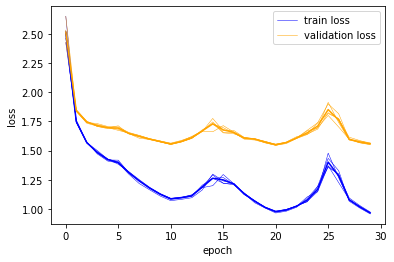

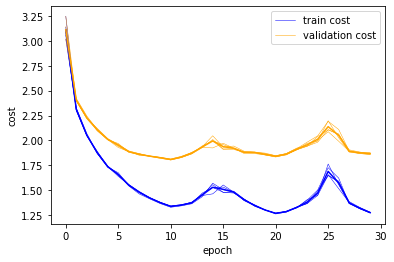

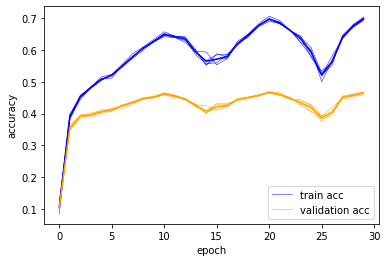

In [6]:
for i in range(5):
    plt.plot(avg_train_loss[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_loss[i],color='orange',linewidth=0.5)
train = np.array(avg_train_loss)
val = np.array(avg_val_loss)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.show()

for i in range(5):
    plt.plot(avg_train_cost[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_cost[i],color='orange',linewidth=0.5)
train = np.array(avg_train_cost)
val = np.array(avg_val_cost)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()

for i in range(5):
    plt.plot(avg_train_acc[i],color='blue',linewidth=0.5)
    plt.plot(avg_val_acc[i],color='orange',linewidth=0.5)
train = np.array(avg_train_acc)
val = np.array(avg_val_acc)
train = np.mean(train,axis=0)
val = np.mean(val,axis=0)
plt.plot(train,color='blue')
plt.plot(val,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train acc','validation acc'])
plt.show()

# best lambda Model

In [10]:
importlib.reload(m)
GD_params = {"epochs":10, "n_batch":100, "eta_min":1e-5,'eta_max':0.1, 'ns':2*np.floor(49000/100), 'n_cycles':4, 'freq':10,'lambda':0.0013894954943731374,'seed':42}
layers, hist = m.load_network(GD_params,'best_lambda',True)
test_acc = m.get_test_acc(X_test,y_test,layers)

train_loss = hist.item()['train_loss']
train_cost = hist.item()['train_cost']
val_loss = hist.item()['val_loss']
val_cost = hist.item()['val_cost']
train_acc = hist.item()['train_acc']
val_acc = hist.item()['val_acc']
print(f'{np.round(train_acc[-1],5)} & {np.round(val_acc[-1],5)} & {np.round(test_acc,5)} \\')


0.60016 & 0.525 & 0.5215 \


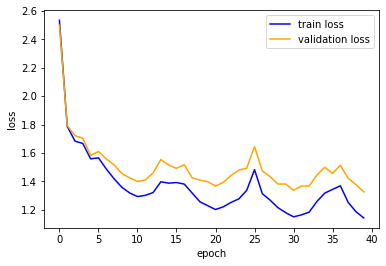

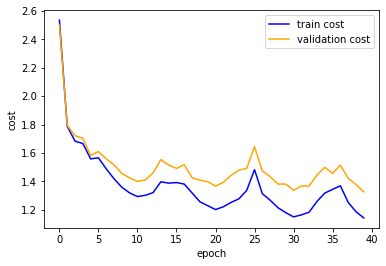

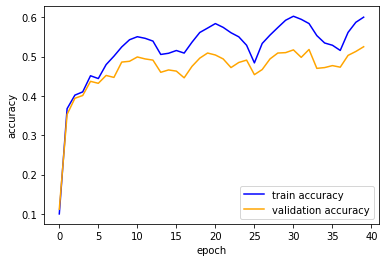

In [11]:
plt.plot(train_loss,color='blue')
plt.plot(val_loss,color='orange')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train loss','validation loss'])
plt.show()

plt.plot(train_loss,color='blue')
plt.plot(val_loss,color='orange')
plt.xlabel('epoch')
plt.ylabel('cost')
plt.legend(['train cost','validation cost'])
plt.show()


plt.plot(train_acc,color='blue')
plt.plot(val_acc,color='orange')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train accuracy','validation accuracy'])
plt.show()